# Data mining 2024

## Author: Αρβανίτης Κωνσταντίνος
## Author: Κούκουζας Αντώνης

## ΑΜ: 1115201700007
## ΑΜ: 1115201700059

### Helper Functions

#### 10 Fold Validation

- `Performs N-fold cross-validation on a given model using data X and labels Y, calculating precision, recall, and F1-scores`


- `Prints metrics for each fold and the overall mean and standard deviation across all folds.`


In [ ]:
def NFoldVal(model,N,X,Y):

  kf = KFold(n_splits=N, shuffle=True, random_state=42)

  precision_scores = []
  recall_scores = []
  f1_scores = []

  for fold, (train_index, val_index) in enumerate(kf.split(X)):
      print(f"Fold {fold + 1}")

      X_train_fold, X_val_fold = X[train_index], X[val_index]
      Y_train_fold, Y_val_fold = Y.iloc[train_index], Y.iloc[val_index]

      model.fit(X_train_fold, Y_train_fold)

      Y_val_pred = model.predict(X_val_fold)

      precision = precision_score(Y_val_fold, Y_val_pred, average='weighted')
      recall = recall_score(Y_val_fold, Y_val_pred, average='weighted')
      f1 = f1_score(Y_val_fold, Y_val_pred, average='weighted')

      print(f"Precision: {precision:.4f}")
      print(f"Recall: {recall:.4f}")
      print(f"F1-score: {f1:.4f}")

      precision_scores.append(precision)
      recall_scores.append(recall)
      f1_scores.append(f1)
      print("-" * 30)

  mean_precision = np.mean(precision_scores)
  mean_recall = np.mean(recall_scores)
  mean_f1 = np.mean(f1_scores)

  std_precision = np.std(precision_scores)
  std_recall = np.std(recall_scores)
  std_f1 = np.std(f1_scores)

  print(f'Mean Precision: {mean_precision:.4f} (± {std_precision:.4f})')
  print(f'Mean Recall: {mean_recall:.4f} (± {std_recall:.4f})')
  print(f'Mean F1-score: {mean_f1:.4f} (± {std_f1:.4f})')


## Preprocessing

### Import prerequisites

In [ ]:
import pandas as pd
import warnings
import re
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from collections import Counter
from bs4 import BeautifulSoup
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import numpy as np
import string
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from transformers import pipeline
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import requests
import zipfile
import os

nltk.download('stopwords')
nltk.download('punkt')
warnings.filterwarnings("ignore")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


### Install Glove 6b 100D

- `Checks if the directory "glove.6B" exists; if not, downloads and extracts the GloVe embeddings.`
- `If the directory already exists, it skips the download and extraction process.`

In [ ]:
directory_path = "glove.6B"

if not os.path.exists(directory_path):
    response = requests.get("https://nlp.stanford.edu/data/glove.6B.zip")
    zip_path = "glove.6B.zip"

    with open(zip_path, "wb") as f:
        f.write(response.content)

    print(f"Downloaded {zip_path}")

    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(directory_path)

    print("Extraction completed.")

    os.remove(zip_path)
else:
    print(f"Directory {directory_path} already exists. Skipping download and extraction.")


Directory glove.6B already exists. Skipping download and extraction.


### Load files

#### 2019

In [ ]:
april_2019 = pd.read_csv('2019/april/reviews.csv')

print(april_2019.shape)

(287433, 6)


In [ ]:
april_2019

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10595,271535,2011-05-20,189305,Pamela,"The apartment was wonderful, fully equiped, be..."
1,10595,1994237,2012-08-15,289831,Andrey,Emmanouil was an excellent host. He provided u...
2,10595,4678609,2013-05-20,2635427,Ahmet,"Manos is a very good host, he is kind and help..."
3,10595,12502994,2014-05-04,2422327,Hema,"Our stay in Emmanouil home was comfortable, qu..."
4,10595,19482948,2014-09-13,6737784,Mariana,Fantastic accommodation very well located to v...
...,...,...,...,...,...,...
287428,33587252,434935542,2019-04-09,120451958,Sam,The host canceled this reservation 16 days bef...
287429,33595046,434643359,2019-04-08,53558070,Leonidas,"The flat was very clean and new, all sanitary ..."
287430,33608367,433965320,2019-04-07,146479545,Dimitris,Καλαίσθητος χώρος! Εξαιρετική τοποθεσία πολύ κ...
287431,33628045,435380704,2019-04-10,102419339,Maria Del Carmen,"Very nice renovated place, nice decoration. Gr..."


#### 2023

In [ ]:
september_2023 = pd.read_csv('2023/september/reviews.csv')

print(september_2023.shape)

(579991, 6)


In [ ]:
september_2023

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,10595,271535,2011-05-20,189305,Pamela,"The apartment was wonderful, fully equiped, be..."
1,10595,1994237,2012-08-15,289831,Andrey,Emmanouil was an excellent host. He provided u...
2,695173,12184199,2014-04-25,8110664,Claudio,"My wife, my daughter and I spent five days of ..."
3,695173,13197921,2014-05-21,15424264,Bahar,We had a great stay at Soula's apartment. We l...
4,695173,13393565,2014-05-26,8504413,Sarah,"Beautiful, clean apartment with plenty of spac..."
...,...,...,...,...,...,...
579986,907232678149978212,919337814709267516,2023-06-22,521195448,Grejisa,Very good
579987,907240732091113014,914329802652702980,2023-06-15,189004631,Julian,Die Unterkunft ist gepflegt und sauber. Der Bl...
579988,907580582384946768,920767347593508939,2023-06-24,27520465,Hussein,Great place for our last night in Athens.<br/>...
579989,918498007621872407,920806964027780226,2023-06-24,95857022,Zoe,Lovely place in Athens! The flat is just renov...


### Clean data

- `Preprocesses the 'comments' column by converting text to lowercase, removing URLs, mentions, hashtags, non-alphabetic characters, and punctuation.`
- `Further cleans the text by normalizing whitespace and removing English stopwords.`




#### 2019

In [ ]:
columns_to_keep = ['id', 'comments']

year2019 = april_2019

year2019.reset_index(drop=True, inplace=True)

year2019 = year2019[columns_to_keep]

In [ ]:

year2019['comments'] = year2019['comments'].astype(str).str.lower()

year2019['comments'] = year2019['comments'].replace(r'http\S+|www\S+|https\S+', '', regex=True)

year2019['comments'] = year2019['comments'].replace(r'\@\w+|\#', '', regex=True)

year2019['comments'] = year2019['comments'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

year2019['comments'] = year2019['comments'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

year2019['comments'] = year2019['comments'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

stop_words = set(stopwords.words('english'))

year2019['comments'] = year2019['comments'].apply(
    lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words])
)

print(year2019.head(10))


         id                                           comments
0    271535  apartment wonderful fully equiped beautiful de...
1   1994237  emmanouil excellent host provided us everythin...
2   4678609  manos good host kind helpful apartments spacio...
3  12502994  stay emmanouil home comfortable quite perfect ...
4  19482948  fantastic accommodation well located visit ath...
5  30613190  manos gracious host made sure arrived airport ...
6  32403740  manos amazing host start polite arrived late n...
7  33072497  appartement correspondant bien la description ...
8  48058154  apartment exactly described comfortable clean ...
9  57859668  great apartment owner people stayed bedrooms b...


#### 2023

In [ ]:
columns_to_keep = ['id', 'comments']

year2023 = september_2023

year2023.reset_index(drop=True, inplace=True)

year2023 = year2023[columns_to_keep]

In [ ]:

year2023['comments'] = year2023['comments'].astype(str).str.lower()

year2023['comments'] = year2023['comments'].replace(r'http\S+|www\S+|https\S+', '', regex=True)

year2023['comments'] = year2023['comments'].replace(r'\@\w+|\#', '', regex=True)

year2023['comments'] = year2023['comments'].apply(lambda x: re.sub(r'[^a-zA-Z\s]', '', x))

year2023['comments'] = year2023['comments'].apply(lambda x: x.translate(str.maketrans('', '', string.punctuation)))

year2023['comments'] = year2023['comments'].apply(lambda x: re.sub(r'\s+', ' ', x).strip())

stop_words = set(stopwords.words('english'))

year2023['comments'] = year2023['comments'].apply(
    lambda x: ' '.join([word for word in word_tokenize(x) if word not in stop_words])
)

print(year2023.head(10))

         id                                           comments
0    271535  apartment wonderful fully equiped beautiful de...
1   1994237  emmanouil excellent host provided us everythin...
2  12184199  wife daughter spent five days beauty light col...
3  13197921  great stay soulas apartment loved decoration f...
4  13393565  beautiful clean apartment plenty space stayed ...
5  13715172  soula charming host handed keys person gave va...
6   4678609  manos good host kind helpful apartments spacio...
7  12502994  stay emmanouil home comfortable quite perfect ...
8  19482948  fantastic accommodation well located visit ath...
9  30613190  manos gracious host made sure arrived airport ...


### Sampling dataset

- `Samples 2000 random rows from the 'year2019' DataFrame and resets the index for the new sample.'`
- `Prints the first few rows of the sampled DataFrame for verification.`

#### 2019

In [ ]:
year2019_sample = year2019.sample(n=2000, random_state=42)

year2019_sample.reset_index(drop=True, inplace=True)

print(year2019_sample.head())

          id                                           comments
0  271675127  apartment perfect downstairs beer wine store s...
1  169091952  great room ac two large beds next super host r...
2  105088023  good stay checkin went smoothly room spacious ...
3  282745079  tout petit avec une terrasse immense fonctionn...
4   63941006  apartment close sights theyre see athens enjoy...


#### 2023

In [ ]:
year2023_sample = year2023.sample(n=2000, random_state=42)

year2023_sample.reset_index(drop=True, inplace=True)

print(year2023_sample.head())

                   id                                           comments
0  537508994161332486                            good location nice flat
1  909186053854860371  great space super friendly responsive host lit...
2  909269220084189350  lespace intrieur du logement est intressant av...
3  526602506745713199  perfect place stay extremely clean comfy cozy ...
4           446272859  anastasias place really well located athens cl...


### Save data

#### 2019

In [ ]:
year2019.to_csv('output/filtered_dataset_2019.csv', index=False)

#### 2023

In [ ]:
year2023.to_csv('output/filtered_dataset_2023.csv', index=False)

## Annotate data with pretrained model

### Prediction

#### 2019

- `Initializes a sentiment analysis pipeline and selects the 'comments' column from the sampled DataFrame for annotation.`
- `Annotates each comment, truncates it to 512 characters, and stores the sentiment label in a new column 'sentiment'.`

In [ ]:
annotator = pipeline("sentiment-analysis")

comments_to_annotate = year2019_sample['comments']

annotations = []

for comment in comments_to_annotate:
    comment = comment[:512]
    annotation = annotator(comment)
    annotations.append(annotation)

year2019_sample.loc[:1999, 'sentiment'] = [annotation[0]['label'] for annotation in annotations]


print(year2019_sample.head(10))


No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

          id                                           comments sentiment
0  271675127  apartment perfect downstairs beer wine store s...  POSITIVE
1  169091952  great room ac two large beds next super host r...  NEGATIVE
2  105088023  good stay checkin went smoothly room spacious ...  POSITIVE
3  282745079  tout petit avec une terrasse immense fonctionn...  POSITIVE
4   63941006  apartment close sights theyre see athens enjoy...  POSITIVE
5  132750157               great host great room great location  POSITIVE
6  184217263  enjoyed stay marias place apartment exactly ap...  POSITIVE
7  148987610  cuando llegamos andrew nos estaba esperando ta...  NEGATIVE
8  148724515                            great place great hosts  POSITIVE
9  176502122  appartement plein de charme proche des points ...  POSITIVE


#### 2023

In [ ]:
annotator = pipeline("sentiment-analysis")

comments_to_annotate = year2023_sample['comments']

annotations = []

for comment in comments_to_annotate:
    comment = comment[:512]
    annotation = annotator(comment)
    annotations.append(annotation)

year2023_sample.loc[:1999, 'sentiment'] = [annotation[0]['label'] for annotation in annotations]


print(year2023_sample.head(10))

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision af0f99b (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.


                   id                                           comments  \
0  537508994161332486                            good location nice flat   
1  909186053854860371  great space super friendly responsive host lit...   
2  909269220084189350  lespace intrieur du logement est intressant av...   
3  526602506745713199  perfect place stay extremely clean comfy cozy ...   
4           446272859  anastasias place really well located athens cl...   
5  719383849510873169  great stay easily one nicest airbnb ive stayed...   
6  440281318096065927  beautifully designed space balcony views acrop...   
7           167319542                 anastasia georgebranastasia george   
8           709358214  partner spent couple days athens short stop is...   
9           573775933  family stayed tonis apartment apartment nice t...   

  sentiment  
0  POSITIVE  
1  POSITIVE  
2  NEGATIVE  
3  POSITIVE  
4  POSITIVE  
5  POSITIVE  
6  POSITIVE  
7  POSITIVE  
8  POSITIVE  
9  POSITIVE  


### Save annotated data

#### 2019

In [ ]:
year2019_sample.to_csv('output/filtered_dataset_2019_annotated.csv', index=False)

#### 2023

In [ ]:
year2023_sample.to_csv('output/filtered_dataset_2023_annotated.csv', index=False)

### Distribution

- `Groups the sampled DataFrame by 'sentiment', counts occurrences, and resets the index to create a summary DataFrame.`
- `Plots a bar chart to visualize the distribution of sentiments, adding labels to each bar and displaying the plot.`

#### 2019

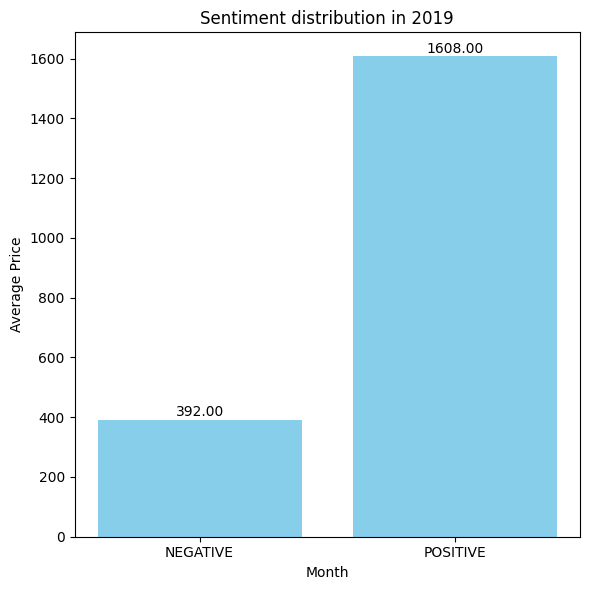

In [ ]:

temp = year2019_sample.groupby('sentiment').count().reset_index()

plt.figure(figsize=(6, 6))
plt.bar(temp['sentiment'], temp['comments'], color='skyblue')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Sentiment distribution in 2019')

for i, price in enumerate(temp['comments']):
    plt.text(i, price + 0.5, f'{price:.2f}', ha='center', va='bottom')

plt.ylim(bottom=0)
plt.tight_layout()
plt.show()


#### 2023

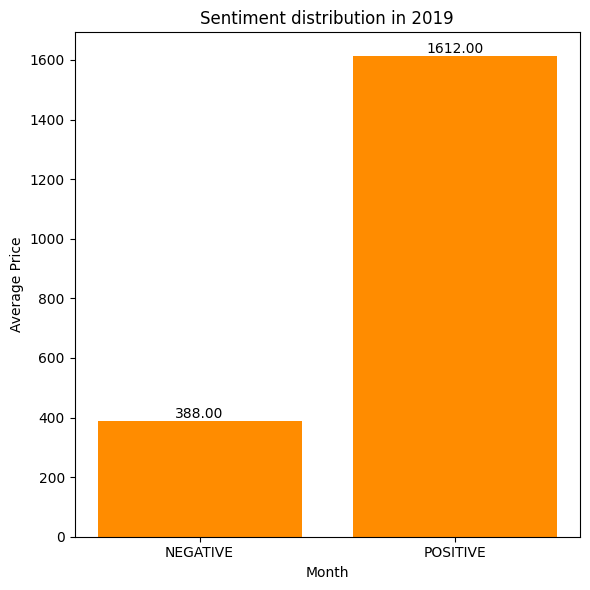

In [ ]:

temp = year2023_sample.groupby('sentiment').count().reset_index()

plt.figure(figsize=(6, 6))
plt.bar(temp['sentiment'], temp['comments'], color='darkorange')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Sentiment distribution in 2019')

for i, price in enumerate(temp['comments']):
    plt.text(i, price + 0.5, f'{price:.2f}', ha='center', va='bottom')

plt.ylim(bottom=0)
plt.tight_layout()
plt.show()

## Model training

### Split datasets

#### 2019

Initial size:

In [ ]:
year2019_sample.shape

(2000, 3)

In [ ]:
year2019_sample

,id,comments,sentiment
0,271675127,apartment perfect downstairs beer wine store s...,POSITIVE
1,169091952,great room ac two large beds next super host r...,NEGATIVE
2,105088023,good stay checkin went smoothly room spacious ...,POSITIVE
3,282745079,tout petit avec une terrasse immense fonctionn...,POSITIVE
4,63941006,apartment close sights theyre see athens enjoy...,POSITIVE
...,...,...,...
1995,104886641,dina provided food coffee milk bread butter ol...,POSITIVE
1996,217794048,place amazing value long day greece nice come ...,POSITIVE
1997,274918428,really good time stevens place one air con bus...,NEGATIVE
1998,193060823,amazing place everything perfect,POSITIVE


Split with 80-20 ratio:

In [ ]:
X_train_2019, X_test_2019, Y_train_2019, Y_test_2019 = train_test_split(year2019_sample['comments'], year2019_sample['sentiment'], test_size=0.2, random_state=42)  # Set a seed for reproducibility


Shapes of the datasets:

In [ ]:
print("Training set: ", X_train_2019.shape,  ", labels: ", Y_train_2019.shape)
print("Test     set: ", X_test_2019.shape,  ", labels: ", Y_test_2019.shape)

Training set:  (1600,) , labels:  (1600,)
Test     set:  (400,) , labels:  (400,)


Save to disk:

In [ ]:
temp = pd.concat([X_train_2019, Y_train_2019], axis=1)

temp.to_csv('output/train_2019.tsv', index=False, sep='\t')


temp = pd.concat([X_test_2019, Y_test_2019], axis=1)

temp.to_csv('output/test_2019.tsv', index=False, sep='\t')

#### 2023

Initial size:

In [ ]:
year2023_sample.shape

(2000, 3)

In [ ]:
year2023_sample

,id,comments,sentiment
0,537508994161332486,good location nice flat,POSITIVE
1,909186053854860371,great space super friendly responsive host lit...,POSITIVE
2,909269220084189350,lespace intrieur du logement est intressant av...,NEGATIVE
3,526602506745713199,perfect place stay extremely clean comfy cozy ...,POSITIVE
4,446272859,anastasias place really well located athens cl...,POSITIVE
...,...,...,...
1995,909206777280443634,trs bien situ dans une impasse calme et proche...,POSITIVE
1996,316291235,petros argiro best hosts house better expected...,NEGATIVE
1997,244159375,,POSITIVE
1998,712141081599620860,amazing stay accommodating delayed flight clea...,POSITIVE


Split with 80-20 ratio:

In [ ]:
X_train_2023, X_test_2023, Y_train_2023, Y_test_2023 = train_test_split(year2023_sample['comments'], year2023_sample['sentiment'], test_size=0.2, random_state=42)  # Set a seed for reproducibility

Shapes of the datasets:

In [ ]:
print("Training set: ", X_train_2023.shape,  ", labels: ", Y_train_2023.shape)
print("Test     set: ", X_test_2023.shape,  ", labels: ", Y_test_2023.shape)

Training set:  (1600,) , labels:  (1600,)
Test     set:  (400,) , labels:  (400,)


Save to disk:

In [ ]:
temp = pd.concat([X_train_2023, Y_train_2023], axis=1)

temp.to_csv('output/train_2023.tsv', index=False, sep='\t')

temp = pd.concat([X_test_2023, Y_test_2023], axis=1)

temp.to_csv('output/test_2023.tsv', index=False, sep='\t')

### TF-IDF

#### Vectorization

- `Initializes a TF-IDF vectorizer with English stopwords and transforms the training data into TF-IDF vectors.`
- `Transforms the test data too into TF-IDF vectors and prints the shape of the resulting training and test matrices.`


---



##### 2019

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train_vectors_2019 = vectorizer.fit_transform(X_train_2019)

X_test_vectors_2019 = vectorizer.transform(X_test_2019)

print("X train vector shape: " , X_train_vectors_2019.shape)
print("Y train vector shape: " , X_test_vectors_2019.shape)

X train vector shape:  (1600, 6990)
Y train vector shape:  (400, 6990)


In [ ]:
tfidf_df_training_2019 = pd.DataFrame(X_train_vectors_2019.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df_test_2019 = pd.DataFrame(X_test_vectors_2019.toarray(), columns=vectorizer.get_feature_names_out())

##### 2023

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')

X_train_vectors_2023 = vectorizer.fit_transform(X_train_2023)

X_test_vectors_2023 = vectorizer.transform(X_test_2023)

print("X train vector shape: " , X_train_vectors_2023.shape)
print("Y train vector shape: " , X_test_vectors_2023.shape)

X train vector shape:  (1600, 6973)
Y train vector shape:  (400, 6973)


In [ ]:
tfidf_df_training_2023 = pd.DataFrame(X_train_vectors_2023.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df_test_2023 = pd.DataFrame(X_test_vectors_2023.toarray(), columns=vectorizer.get_feature_names_out())

#### SVM

##### 2019

- `Trains an SVM model with a linear kernel on the TF-IDF vectorized training data and makes predictions on the test data.`
- `Calculates and prints precision, recall, and F1-score, along with a detailed classification report, and performs 10-fold cross-validation.`


###### Initialize Model

In [ ]:
svm_model_2019 = SVC(kernel='linear', C=1.0, random_state=42)

###### Train model

In [ ]:
svm_model_2019.fit(tfidf_df_training_2019, Y_train_2019)

SVC(kernel='linear', random_state=42)

###### Predict and Evaluate

In [ ]:
y_pred_svm_2019 = svm_model_2019.predict(tfidf_df_test_2019)

precision = precision_score(Y_test_2019, y_pred_svm_2019, average='weighted')
recall = recall_score(Y_test_2019, y_pred_svm_2019, average='weighted')
f1 = f1_score(Y_test_2019, y_pred_svm_2019, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print(classification_report(Y_test_2019, y_pred_svm_2019))

Precision: 0.9068
Recall: 0.9100
F1-score: 0.9044
              precision    recall  f1-score   support

    NEGATIVE       0.85      0.63      0.72        75
    POSITIVE       0.92      0.98      0.95       325

    accuracy                           0.91       400
   macro avg       0.89      0.80      0.83       400
weighted avg       0.91      0.91      0.90       400



###### 10 Fold Validation

In [ ]:
NFoldVal(svm_model_2019, 10, X_train_vectors_2019, Y_train_2019)

Fold 1
Precision: 0.8835
Recall: 0.8875
F1-score: 0.8799
------------------------------
Fold 2
Precision: 0.8678
Recall: 0.8750
F1-score: 0.8583
------------------------------
Fold 3
Precision: 0.8952
Recall: 0.8938
F1-score: 0.8843
------------------------------
Fold 4
Precision: 0.8856
Recall: 0.8938
F1-score: 0.8844
------------------------------
Fold 5
Precision: 0.8522
Recall: 0.8438
F1-score: 0.8232
------------------------------
Fold 6
Precision: 0.9022
Recall: 0.9000
F1-score: 0.8850
------------------------------
Fold 7
Precision: 0.8814
Recall: 0.8812
F1-score: 0.8664
------------------------------
Fold 8
Precision: 0.9184
Recall: 0.9187
F1-score: 0.9135
------------------------------
Fold 9
Precision: 0.9030
Recall: 0.9062
F1-score: 0.9033
------------------------------
Fold 10
Precision: 0.9022
Recall: 0.9062
F1-score: 0.8988
------------------------------
Mean Precision: 0.8891 (± 0.0183)
Mean Recall: 0.8906 (± 0.0198)
Mean F1-score: 0.8797 (± 0.0244)


##### 2023

###### Initialize Model

In [ ]:
svm_model_2023 = SVC(kernel='linear', C=1.0, random_state=42)

###### Train Model

In [ ]:
svm_model_2023.fit(tfidf_df_training_2023, Y_train_2023)

SVC(kernel='linear', random_state=42)

###### Predict and Evaluate

In [ ]:
y_pred_svm_2023 = svm_model_2023.predict(tfidf_df_test_2023)

precision = precision_score(Y_test_2023, y_pred_svm_2023, average='weighted')
recall = recall_score(Y_test_2023, y_pred_svm_2023, average='weighted')
f1 = f1_score(Y_test_2023, y_pred_svm_2023, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

report_rf_2019 = classification_report(Y_test_2023, y_pred_svm_2023)
print("Random Forest Classification Report:")
print(report_rf_2019)

Precision: 0.9019
Recall: 0.8925
F1-score: 0.8775
Random Forest Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.97      0.48      0.64        81
    POSITIVE       0.88      1.00      0.94       319

    accuracy                           0.89       400
   macro avg       0.93      0.74      0.79       400
weighted avg       0.90      0.89      0.88       400



###### 10 Fold Validation

In [ ]:
NFoldVal(svm_model_2023, 10, X_train_vectors_2023, Y_train_2023)

Fold 1
Precision: 0.9160
Recall: 0.9062
F1-score: 0.8939
------------------------------
Fold 2
Precision: 0.9314
Recall: 0.9313
F1-score: 0.9244
------------------------------
Fold 3
Precision: 0.8564
Recall: 0.8562
F1-score: 0.8402
------------------------------
Fold 4
Precision: 0.9226
Recall: 0.9250
F1-score: 0.9189
------------------------------
Fold 5
Precision: 0.9487
Recall: 0.9500
F1-score: 0.9482
------------------------------
Fold 6
Precision: 0.8091
Recall: 0.8250
F1-score: 0.8078
------------------------------
Fold 7
Precision: 0.8748
Recall: 0.8812
F1-score: 0.8736
------------------------------
Fold 8
Precision: 0.9199
Recall: 0.9187
F1-score: 0.9095
------------------------------
Fold 9
Precision: 0.8879
Recall: 0.8812
F1-score: 0.8644
------------------------------
Fold 10
Precision: 0.8899
Recall: 0.8812
F1-score: 0.8680
------------------------------
Mean Precision: 0.8957 (± 0.0392)
Mean Recall: 0.8956 (± 0.0359)
Mean F1-score: 0.8849 (± 0.0402)


#### Random forest

- `Trains a Random Forest classifier with 100 trees on the TF-IDF vectorized training data and makes predictions on the test data.`
- `Calculates and prints precision, recall, and F1-score, along with a detailed classification report, and performs 10-fold cross-validation.`


##### 2019

###### Initialize Model

In [ ]:
rf_model_2019 = RandomForestClassifier(n_estimators=100, random_state=42)

###### Train Model

In [ ]:
rf_model_2019.fit(X_train_vectors_2019, Y_train_2019)

RandomForestClassifier(random_state=42)

###### Predict and Evaluate

In [ ]:
y_pred_rf_2019 = rf_model_2019.predict(X_test_vectors_2019)

precision = precision_score(Y_test_2019, y_pred_rf_2019, average='weighted')
recall = recall_score(Y_test_2019, y_pred_rf_2019, average='weighted')
f1 = f1_score(Y_test_2019, y_pred_rf_2019, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

report_rf_2019 = classification_report(Y_test_2019, y_pred_rf_2019)
print("Random Forest Classification Report:")
print(report_rf_2019)

Precision: 0.9073
Recall: 0.9100
F1-score: 0.9037
Random Forest Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       0.87      0.61      0.72        75
    POSITIVE       0.92      0.98      0.95       325

    accuracy                           0.91       400
   macro avg       0.89      0.80      0.83       400
weighted avg       0.91      0.91      0.90       400



###### 10 Fold Validation

In [ ]:
NFoldVal(rf_model_2019, 10, X_train_vectors_2019, Y_train_2019)

Fold 1
Precision: 0.8701
Recall: 0.8750
F1-score: 0.8644
------------------------------
Fold 2
Precision: 0.8788
Recall: 0.8812
F1-score: 0.8638
------------------------------
Fold 3
Precision: 0.9053
Recall: 0.9000
F1-score: 0.8902
------------------------------
Fold 4
Precision: 0.8866
Recall: 0.8938
F1-score: 0.8816
------------------------------
Fold 5
Precision: 0.8586
Recall: 0.8562
F1-score: 0.8422
------------------------------
Fold 6
Precision: 0.8905
Recall: 0.8938
F1-score: 0.8794
------------------------------
Fold 7
Precision: 0.8685
Recall: 0.8688
F1-score: 0.8491
------------------------------
Fold 8
Precision: 0.9184
Recall: 0.9187
F1-score: 0.9135
------------------------------
Fold 9
Precision: 0.9030
Recall: 0.9062
F1-score: 0.9033
------------------------------
Fold 10
Precision: 0.9022
Recall: 0.9062
F1-score: 0.8988
------------------------------
Mean Precision: 0.8882 (± 0.0182)
Mean Recall: 0.8900 (± 0.0184)
Mean F1-score: 0.8786 (± 0.0223)


##### 2023

###### Initialize Model

In [ ]:
rf_model_2023 = RandomForestClassifier(n_estimators=100, random_state=42)

###### Train Model

In [ ]:
rf_model_2023.fit(X_train_vectors_2023, Y_train_2023)

RandomForestClassifier(random_state=42)

###### Predict and Evaluate

In [ ]:
y_pred_rf_2023 = rf_model_2023.predict(X_test_vectors_2023)

precision = precision_score(Y_test_2023, y_pred_rf_2023, average='weighted')
recall = recall_score(Y_test_2023, y_pred_rf_2023, average='weighted')
f1 = f1_score(Y_test_2023, y_pred_rf_2023, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

print("Random Forest Classification Report:")
print(classification_report(Y_test_2023, y_pred_rf_2023))

Precision: 0.9014
Recall: 0.8875
F1-score: 0.8696
Random Forest Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       1.00      0.44      0.62        81
    POSITIVE       0.88      1.00      0.93       319

    accuracy                           0.89       400
   macro avg       0.94      0.72      0.77       400
weighted avg       0.90      0.89      0.87       400



###### 10 Fold Validation

In [ ]:
NFoldVal(rf_model_2023, 10, X_train_vectors_2023, Y_train_2023)

Fold 1
Precision: 0.9211
Recall: 0.9125
F1-score: 0.9020
------------------------------
Fold 2
Precision: 0.9222
Recall: 0.9250
F1-score: 0.9186
------------------------------
Fold 3
Precision: 0.8811
Recall: 0.8812
F1-score: 0.8720
------------------------------
Fold 4
Precision: 0.9075
Recall: 0.9125
F1-score: 0.9054
------------------------------
Fold 5
Precision: 0.9422
Recall: 0.9437
F1-score: 0.9411
------------------------------
Fold 6
Precision: 0.8091
Recall: 0.8250
F1-score: 0.8078
------------------------------
Fold 7
Precision: 0.8602
Recall: 0.8688
F1-score: 0.8602
------------------------------
Fold 8
Precision: 0.9199
Recall: 0.9187
F1-score: 0.9095
------------------------------
Fold 9
Precision: 0.8879
Recall: 0.8812
F1-score: 0.8644
------------------------------
Fold 10
Precision: 0.8905
Recall: 0.8875
F1-score: 0.8779
------------------------------
Mean Precision: 0.8942 (± 0.0364)
Mean Recall: 0.8956 (± 0.0324)
Mean F1-score: 0.8859 (± 0.0358)


#### KNN (TODO)

- `Trains a K-Nearest Neighbors (KNN) classifier with 5 neighbors on the TF-IDF vectorized training data and makes predictions on the test data.`
- `Calculates and prints precision, recall, and F1-score, along with a detailed classification report, and performs 10-fold cross-validation.`


##### 2019

###### Initialize Model

In [ ]:

knn_model_2019 = KNeighborsClassifier(n_neighbors=5)

###### Train Model

In [ ]:
knn_model_2019.fit(X_train_vectors_2019, Y_train_2019)

KNeighborsClassifier()

###### Predict and Evaluate

In [ ]:
y_pred_knn_2019 = knn_model_2019.predict(X_test_vectors_2019)

precision = precision_score(Y_test_2019, y_pred_knn_2019, average='weighted')
recall = recall_score(Y_test_2019, y_pred_knn_2019, average='weighted')
f1 = f1_score(Y_test_2019, y_pred_knn_2019, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

report_knn = classification_report(Y_test_2019, y_pred_knn_2019)
print("KNN Classification Report:")
print(report_knn)

Precision: 0.8510
Recall: 0.8175
F1-score: 0.7402
KNN Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       1.00      0.03      0.05        75
    POSITIVE       0.82      1.00      0.90       325

    accuracy                           0.82       400
   macro avg       0.91      0.51      0.48       400
weighted avg       0.85      0.82      0.74       400



###### 10 fold Validation

In [ ]:
NFoldVal(knn_model_2019, 10, X_train_vectors_2019, Y_train_2019)

Fold 1
Precision: 0.6202
Recall: 0.7875
F1-score: 0.6939
------------------------------
Fold 2
Precision: 0.6704
Recall: 0.8187
F1-score: 0.7372
------------------------------
Fold 3
Precision: 0.8368
Recall: 0.7937
F1-score: 0.7138
------------------------------
Fold 4
Precision: 0.7014
Recall: 0.8375
F1-score: 0.7634
------------------------------
Fold 5
Precision: 0.5532
Recall: 0.7438
F1-score: 0.6345
------------------------------
Fold 6
Precision: 0.6910
Recall: 0.8313
F1-score: 0.7547
------------------------------
Fold 7
Precision: 0.8440
Recall: 0.8063
F1-score: 0.7257
------------------------------
Fold 8
Precision: 0.6400
Recall: 0.8000
F1-score: 0.7111
------------------------------
Fold 9
Precision: 0.6300
Recall: 0.7937
F1-score: 0.7025
------------------------------
Fold 10
Precision: 0.8599
Recall: 0.8313
F1-score: 0.7605
------------------------------
Mean Precision: 0.7047 (± 0.1011)
Mean Recall: 0.8044 (± 0.0264)
Mean F1-score: 0.7197 (± 0.0367)


##### 2023

###### Initialize Model

In [ ]:
knn_model_2023 = KNeighborsClassifier(n_neighbors=5)

###### Train Model

In [ ]:
knn_model_2023.fit(X_train_vectors_2023, Y_train_2023)

KNeighborsClassifier()

###### Predict and Evaluate

In [ ]:
y_pred_knn_2023 = knn_model_2023.predict(X_test_vectors_2023)

precision = precision_score(Y_test_2023, y_pred_knn_2023, average='weighted')
recall = recall_score(Y_test_2023, y_pred_knn_2023, average='weighted')
f1 = f1_score(Y_test_2023, y_pred_knn_2023, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

report_knn = classification_report(Y_test_2023, y_pred_knn_2023)
print("KNN Classification Report:")
print(report_knn)

Precision: 0.8401
Recall: 0.8000
F1-score: 0.7136
KNN Classification Report:
              precision    recall  f1-score   support

    NEGATIVE       1.00      0.01      0.02        81
    POSITIVE       0.80      1.00      0.89       319

    accuracy                           0.80       400
   macro avg       0.90      0.51      0.46       400
weighted avg       0.84      0.80      0.71       400



###### 10 Fold Validation

In [ ]:
NFoldVal(knn_model_2023, 10, X_train_vectors_2023, Y_train_2023)

Fold 1
Precision: 0.6500
Recall: 0.8063
F1-score: 0.7198
------------------------------
Fold 2
Precision: 0.7225
Recall: 0.8500
F1-score: 0.7811
------------------------------
Fold 3
Precision: 0.5814
Recall: 0.7625
F1-score: 0.6598
------------------------------
Fold 4
Precision: 0.7119
Recall: 0.8438
F1-score: 0.7722
------------------------------
Fold 5
Precision: 0.7119
Recall: 0.8438
F1-score: 0.7722
------------------------------
Fold 6
Precision: 0.6104
Recall: 0.7812
F1-score: 0.6853
------------------------------
Fold 7
Precision: 0.6400
Recall: 0.8000
F1-score: 0.7111
------------------------------
Fold 8
Precision: 0.7014
Recall: 0.8375
F1-score: 0.7634
------------------------------
Fold 9
Precision: 0.6300
Recall: 0.7937
F1-score: 0.7025
------------------------------
Fold 10
Precision: 0.5814
Recall: 0.7625
F1-score: 0.6598
------------------------------
Mean Precision: 0.6541 (± 0.0518)
Mean Recall: 0.8081 (± 0.0321)
Mean F1-score: 0.7227 (± 0.0446)


### Word Embeddings

#### Vectorization (TODO)

##### Compute Average Embedding

- `Loads GloVe embeddings from a file into a dictionary and initializes a tokenizer to convert text data into sequences of integers.`
- `Pads these sequences to a fixed length and computes average embeddings for each padded sequence using the embedding matrix.`


In [ ]:
def compute_average_embedding(sequences, embedding_matrix):
    avg_embeddings = []
    for seq in sequences:
        valid_embeddings = [embedding_matrix[idx] for idx in seq if idx != 0]
        if valid_embeddings:
            avg_embedding = np.mean(valid_embeddings, axis=0)
        else:
            avg_embedding = np.zeros(embedding_matrix.shape[1])
        avg_embeddings.append(avg_embedding)
    return np.array(avg_embeddings)

##### 2019

In [ ]:
embedding_index = {}
glove_path = 'glove.6B/glove.6B.100d.txt'

with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

print("Loaded GloVe embeddings.")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_2019)

X_train_sequences_2019 = tokenizer.texts_to_sequences(X_train_2019)
X_test_sequences_2019 = tokenizer.texts_to_sequences(X_test_2019)

maxlen = 100
X_train_pad_2019 = pad_sequences(X_train_sequences_2019, maxlen=maxlen, padding='post')
X_test_pad_2019 = pad_sequences(X_test_sequences_2019, maxlen=maxlen, padding='post')

num_words = len(tokenizer.word_index) + 1
embedding_dim = 100

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Shape of X_train_pad:", X_train_pad_2019.shape)
print("Shape of X_test_pad:", X_test_pad_2019.shape)


X_train_avg_2019 = compute_average_embedding(X_train_pad_2019, embedding_matrix)
X_test_avg_2019 = compute_average_embedding(X_test_pad_2019, embedding_matrix)


Loaded GloVe embeddings.
Shape of X_train_pad: (1600, 100)
Shape of X_test_pad: (400, 100)


##### 2023

In [ ]:
embedding_index = {}
glove_path = 'glove.6B/glove.6B.100d.txt'

with open(glove_path, 'r', encoding='utf8') as f:
    for line in f:
        values = line.split()
        word = values[0]
        coefs = np.asarray(values[1:], dtype='float32')
        embedding_index[word] = coefs

print("Loaded GloVe embeddings.")

tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train_2023)

X_train_sequences_2023 = tokenizer.texts_to_sequences(X_train_2023)
X_test_sequences_2023 = tokenizer.texts_to_sequences(X_test_2023)

maxlen = 100
X_train_pad_2023 = pad_sequences(X_train_sequences_2023, maxlen=maxlen, padding='post')
X_test_pad_2023 = pad_sequences(X_test_sequences_2023, maxlen=maxlen, padding='post')

num_words = len(tokenizer.word_index) + 1
embedding_dim = 100

embedding_matrix = np.zeros((num_words, embedding_dim))
for word, i in tokenizer.word_index.items():
    embedding_vector = embedding_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

print("Shape of X_train_pad:", X_train_pad_2023.shape)
print("Shape of X_test_pad:", X_test_pad_2023.shape)


X_train_avg_2023 = compute_average_embedding(X_train_pad_2023, embedding_matrix)
X_test_avg_2023 = compute_average_embedding(X_test_pad_2023, embedding_matrix)

Loaded GloVe embeddings.
Shape of X_train_pad: (1600, 100)
Shape of X_test_pad: (400, 100)


#### SVM

##### 2019

- `Trains an SVM model with a linear kernel on the average embeddings of the training data and makes predictions on the test data.`
- `Calculates and prints precision, recall, and F1-score, along with a detailed classification report, and performs 10-fold cross-validation.`


###### Initialize Model

In [ ]:
svm_model_2019 = SVC(kernel='linear', C=1.0, random_state=42)

###### Train Model

In [ ]:
svm_model_2019.fit(X_train_avg_2019, Y_train_2019)

SVC(kernel='linear', random_state=42)

###### Predict and Evaluate

In [ ]:
Y_pred_2019 = svm_model_2019.predict(X_test_avg_2019)

precision = precision_score(Y_test_2019, Y_pred_2019, average='weighted')
recall = recall_score(Y_test_2019, Y_pred_2019, average='weighted')
f1 = f1_score(Y_test_2019, Y_pred_2019, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

report = classification_report(Y_test_2019, Y_pred_2019)
print("Classification Report:\n", report)

Precision: 0.9176
Recall: 0.9200
F1-score: 0.9182
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.82      0.73      0.77        75
    POSITIVE       0.94      0.96      0.95       325

    accuracy                           0.92       400
   macro avg       0.88      0.85      0.86       400
weighted avg       0.92      0.92      0.92       400



###### 10 Fold Validation

In [ ]:
NFoldVal(svm_model_2019, 10, X_train_avg_2019, Y_train_2019)

Fold 1
Precision: 0.8968
Recall: 0.9000
F1-score: 0.8949
------------------------------
Fold 2
Precision: 0.8948
Recall: 0.9000
F1-score: 0.8935
------------------------------
Fold 3
Precision: 0.9036
Recall: 0.9062
F1-score: 0.9023
------------------------------
Fold 4
Precision: 0.8860
Recall: 0.8938
F1-score: 0.8868
------------------------------
Fold 5
Precision: 0.8722
Recall: 0.8750
F1-score: 0.8688
------------------------------
Fold 6
Precision: 0.9081
Recall: 0.9125
F1-score: 0.9080
------------------------------
Fold 7
Precision: 0.8893
Recall: 0.8938
F1-score: 0.8869
------------------------------
Fold 8
Precision: 0.8965
Recall: 0.9000
F1-score: 0.8974
------------------------------
Fold 9
Precision: 0.9125
Recall: 0.9125
F1-score: 0.9125
------------------------------
Fold 10
Precision: 0.9050
Recall: 0.9062
F1-score: 0.9056
------------------------------
Mean Precision: 0.8965 (± 0.0113)
Mean Recall: 0.9000 (± 0.0105)
Mean F1-score: 0.8957 (± 0.0121)


##### 2023

###### Initialize Model

In [ ]:
svm_model_2023 = SVC(kernel='linear', C=1.0, random_state=42)

###### Train Model

In [ ]:
svm_model_2023.fit(X_train_avg_2023, Y_train_2023)

SVC(kernel='linear', random_state=42)

###### Predict and Evaluate

In [ ]:
Y_pred_2023 = svm_model_2023.predict(X_test_avg_2023)

precision = precision_score(Y_test_2023, Y_pred_2023, average='weighted')
recall = recall_score(Y_test_2023, Y_pred_2023, average='weighted')
f1 = f1_score(Y_test_2023, Y_pred_2023, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

report = classification_report(Y_test_2023, Y_pred_2023)
print("Classification Report:\n", report)

Precision: 0.8940
Recall: 0.8975
F1-score: 0.8908
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.84      0.60      0.71        81
    POSITIVE       0.91      0.97      0.94       319

    accuracy                           0.90       400
   macro avg       0.88      0.79      0.82       400
weighted avg       0.89      0.90      0.89       400



###### 10 Fold Validation

In [ ]:
NFoldVal(svm_model_2023, 10, X_train_avg_2023, Y_train_2023)

Fold 1
Precision: 0.9270
Recall: 0.9250
F1-score: 0.9192
------------------------------
Fold 2
Precision: 0.9228
Recall: 0.9250
F1-score: 0.9236
------------------------------
Fold 3
Precision: 0.8776
Recall: 0.8812
F1-score: 0.8754
------------------------------
Fold 4
Precision: 0.9429
Recall: 0.9437
F1-score: 0.9433
------------------------------
Fold 5
Precision: 0.9359
Recall: 0.9375
F1-score: 0.9364
------------------------------
Fold 6
Precision: 0.8502
Recall: 0.8562
F1-score: 0.8521
------------------------------
Fold 7
Precision: 0.8822
Recall: 0.8875
F1-score: 0.8830
------------------------------
Fold 8
Precision: 0.9218
Recall: 0.9250
F1-score: 0.9209
------------------------------
Fold 9
Precision: 0.8898
Recall: 0.8938
F1-score: 0.8872
------------------------------
Fold 10
Precision: 0.9137
Recall: 0.9125
F1-score: 0.9076
------------------------------
Mean Precision: 0.9064 (± 0.0283)
Mean Recall: 0.9088 (± 0.0265)
Mean F1-score: 0.9049 (± 0.0278)


#### Random forest

- `Trains a Random Forest classifier with 100 trees on the average embeddings of the training data and makes predictions on the test data.`
- `Calculates and prints precision, recall, and F1-score, along with a detailed classification report, and performs 10-fold cross-validation.`


##### 2019

###### Initialize Model

In [ ]:
rf_model_2019 = RandomForestClassifier(n_estimators=100, random_state=42)

###### Train Model

In [ ]:
rf_model_2019.fit(X_train_avg_2019, Y_train_2019)

RandomForestClassifier(random_state=42)

###### Predict and Evaluate

In [ ]:
Y_pred = rf_model_2019.predict(X_test_avg_2019)

precision = precision_score(Y_test_2019, Y_pred_2019, average='weighted')
recall = recall_score(Y_test_2019, Y_pred_2019, average='weighted')
f1 = f1_score(Y_test_2019, Y_pred_2019, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print classification report
report = classification_report(Y_test_2019, Y_pred_2019)
print("Classification Report:\n", report)

Precision: 0.9176
Recall: 0.9200
F1-score: 0.9182
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.82      0.73      0.77        75
    POSITIVE       0.94      0.96      0.95       325

    accuracy                           0.92       400
   macro avg       0.88      0.85      0.86       400
weighted avg       0.92      0.92      0.92       400



###### 10 Fold Validation

In [ ]:
NFoldVal(rf_model_2019, 10, X_train_avg_2019, Y_train_2019)

Fold 1
Precision: 0.9034
Recall: 0.9062
F1-score: 0.9021
------------------------------
Fold 2
Precision: 0.8891
Recall: 0.8938
F1-score: 0.8835
------------------------------
Fold 3
Precision: 0.9251
Recall: 0.9250
F1-score: 0.9213
------------------------------
Fold 4
Precision: 0.8950
Recall: 0.9000
F1-score: 0.8966
------------------------------
Fold 5
Precision: 0.8722
Recall: 0.8750
F1-score: 0.8688
------------------------------
Fold 6
Precision: 0.9151
Recall: 0.9187
F1-score: 0.9154
------------------------------
Fold 7
Precision: 0.8686
Recall: 0.8750
F1-score: 0.8634
------------------------------
Fold 8
Precision: 0.9297
Recall: 0.9313
F1-score: 0.9290
------------------------------
Fold 9
Precision: 0.9168
Recall: 0.9187
F1-score: 0.9173
------------------------------
Fold 10
Precision: 0.9030
Recall: 0.9062
F1-score: 0.9041
------------------------------
Mean Precision: 0.9018 (± 0.0198)
Mean Recall: 0.9050 (± 0.0185)
Mean F1-score: 0.9001 (± 0.0211)


##### 2023

###### Initialize Model

In [ ]:
rf_model_2023 = RandomForestClassifier(n_estimators=100, random_state=42)

###### Train Model

In [ ]:
rf_model_2023.fit(X_train_avg_2023, Y_train_2023)

RandomForestClassifier(random_state=42)

###### Predict and Evaluate

In [ ]:
Y_pred = rf_model_2023.predict(X_test_avg_2023)

precision = precision_score(Y_test_2023, Y_pred_2023, average='weighted')
recall = recall_score(Y_test_2023, Y_pred_2023, average='weighted')
f1 = f1_score(Y_test_2023, Y_pred_2023, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

report = classification_report(Y_test_2023, Y_pred_2023)
print("Classification Report:\n", report)

Precision: 0.8940
Recall: 0.8975
F1-score: 0.8908
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.84      0.60      0.71        81
    POSITIVE       0.91      0.97      0.94       319

    accuracy                           0.90       400
   macro avg       0.88      0.79      0.82       400
weighted avg       0.89      0.90      0.89       400



###### 10 Fold Validation

In [ ]:
NFoldVal(rf_model_2023, 10, X_train_avg_2023, Y_train_2023)

Fold 1
Precision: 0.9367
Recall: 0.9313
F1-score: 0.9252
------------------------------
Fold 2
Precision: 0.9142
Recall: 0.9187
F1-score: 0.9148
------------------------------
Fold 3
Precision: 0.8995
Recall: 0.9000
F1-score: 0.8944
------------------------------
Fold 4
Precision: 0.9359
Recall: 0.9375
F1-score: 0.9364
------------------------------
Fold 5
Precision: 0.9488
Recall: 0.9500
F1-score: 0.9491
------------------------------
Fold 6
Precision: 0.8709
Recall: 0.8750
F1-score: 0.8722
------------------------------
Fold 7
Precision: 0.8822
Recall: 0.8875
F1-score: 0.8830
------------------------------
Fold 8
Precision: 0.9421
Recall: 0.9437
F1-score: 0.9423
------------------------------
Fold 9
Precision: 0.8978
Recall: 0.9000
F1-score: 0.8930
------------------------------
Fold 10
Precision: 0.9079
Recall: 0.9062
F1-score: 0.9003
------------------------------
Mean Precision: 0.9136 (± 0.0253)
Mean Recall: 0.9150 (± 0.0239)
Mean F1-score: 0.9111 (± 0.0251)


#### KNN

- `Trains a K-Nearest Neighbors (KNN) classifier with 5 neighbors on the average embeddings of the training data and makes predictions on the test data.`
- `Calculates and prints precision, recall, and F1-score, along with a detailed classification report, and performs 10-fold cross-validation.`


##### 2019

###### Initialize

In [ ]:
knn_model_2019 = KNeighborsClassifier(n_neighbors=5)

###### Train Model

In [ ]:
knn_model_2019.fit(X_train_avg_2019, Y_train_2019)

KNeighborsClassifier()

###### Predict and Evaluate

In [ ]:
Y_pred = knn_model_2019.predict(X_test_avg_2019)

precision = precision_score(Y_test_2019, Y_pred_2019, average='weighted')
recall = recall_score(Y_test_2019, Y_pred_2019, average='weighted')
f1 = f1_score(Y_test_2019, Y_pred_2019, average='weighted')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

report = classification_report(Y_test_2019, Y_pred_2019)
print("Classification Report:\n", report)

Precision: 0.9176
Recall: 0.9200
F1-score: 0.9182
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.82      0.73      0.77        75
    POSITIVE       0.94      0.96      0.95       325

    accuracy                           0.92       400
   macro avg       0.88      0.85      0.86       400
weighted avg       0.92      0.92      0.92       400



###### 10 Fold Validation

In [ ]:
NFoldVal(knn_model_2019, 10, X_train_avg_2019, Y_train_2019)

Fold 1
Precision: 0.9034
Recall: 0.9062
F1-score: 0.9021
------------------------------
Fold 2
Precision: 0.8821
Recall: 0.8875
F1-score: 0.8753
------------------------------
Fold 3
Precision: 0.8899
Recall: 0.8938
F1-score: 0.8893
------------------------------
Fold 4
Precision: 0.8843
Recall: 0.8875
F1-score: 0.8857
------------------------------
Fold 5
Precision: 0.8582
Recall: 0.8625
F1-score: 0.8557
------------------------------
Fold 6
Precision: 0.9087
Recall: 0.9125
F1-score: 0.9096
------------------------------
Fold 7
Precision: 0.8676
Recall: 0.8750
F1-score: 0.8680
------------------------------
Fold 8
Precision: 0.9125
Recall: 0.9125
F1-score: 0.9125
------------------------------
Fold 9
Precision: 0.9125
Recall: 0.9125
F1-score: 0.9125
------------------------------
Fold 10
Precision: 0.9030
Recall: 0.9062
F1-score: 0.9041
------------------------------
Mean Precision: 0.8922 (± 0.0181)
Mean Recall: 0.8956 (± 0.0165)
Mean F1-score: 0.8915 (± 0.0190)


##### 2023

###### Initialize

In [ ]:
knn_model_2023 = KNeighborsClassifier(n_neighbors=5)

###### Train Model

In [ ]:
knn_model_2023.fit(X_train_avg_2023, Y_train_2023)

KNeighborsClassifier()

###### Predict and Evaluate

In [ ]:
Y_pred = knn_model_2023.predict(X_test_avg_2023)

precision = precision_score(Y_test_2023, Y_pred_2023, average='weighted')
recall = recall_score(Y_test_2023, Y_pred_2023, average='weighted')
f1 = f1_score(Y_test_2023, Y_pred_2023, average='weighted')

# Print the metrics with 4 decimal places
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# Print classification report
report = classification_report(Y_test_2023, Y_pred_2023)
print("Classification Report:\n", report)

Precision: 0.8940
Recall: 0.8975
F1-score: 0.8908
Classification Report:
               precision    recall  f1-score   support

    NEGATIVE       0.84      0.60      0.71        81
    POSITIVE       0.91      0.97      0.94       319

    accuracy                           0.90       400
   macro avg       0.88      0.79      0.82       400
weighted avg       0.89      0.90      0.89       400



###### 10 Fold Validation

In [ ]:
NFoldVal(knn_model_2023, 10, X_train_avg_2023, Y_train_2023)

Fold 1
Precision: 0.9212
Recall: 0.9187
F1-score: 0.9116
------------------------------
Fold 2
Precision: 0.8956
Recall: 0.8938
F1-score: 0.8946
------------------------------
Fold 3
Precision: 0.8776
Recall: 0.8812
F1-score: 0.8754
------------------------------
Fold 4
Precision: 0.9448
Recall: 0.9437
F1-score: 0.9442
------------------------------
Fold 5
Precision: 0.9448
Recall: 0.9437
F1-score: 0.9442
------------------------------
Fold 6
Precision: 0.8578
Recall: 0.8625
F1-score: 0.8594
------------------------------
Fold 7
Precision: 0.8822
Recall: 0.8875
F1-score: 0.8830
------------------------------
Fold 8
Precision: 0.9360
Recall: 0.9375
F1-score: 0.9365
------------------------------
Fold 9
Precision: 0.8898
Recall: 0.8938
F1-score: 0.8872
------------------------------
Fold 10
Precision: 0.9196
Recall: 0.9187
F1-score: 0.9147
------------------------------
Mean Precision: 0.9069 (± 0.0290)
Mean Recall: 0.9081 (± 0.0270)
Mean F1-score: 0.9051 (± 0.0284)
